In [2]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

In [3]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/Preprocessed Time Series Final.csv')

In [4]:
# Define features and target
features = ['price'] + [f'category_code_{i}' for i in range(5)] + [f'brand_{i}' for i in range(12)]
X = df[features]
y = df['event_type']

In [5]:
''' # Encode target if it's not numeric
if y.dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    y = LabelEncoder().fit_transform(y) '''

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [11]:
# Initialize and fit CatBoostClassifier
model = CatBoostClassifier(verbose=0)  # suppress output
model.fit(X_train, y_train)

In [12]:
# Predictions and evaluation
y_pred = model.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.77      0.58     66666
           1       0.44      0.12      0.19     66667
           2       0.55      0.60      0.57     66667

    accuracy                           0.50    200000
   macro avg       0.49      0.50      0.45    200000
weighted avg       0.49      0.50      0.45    200000



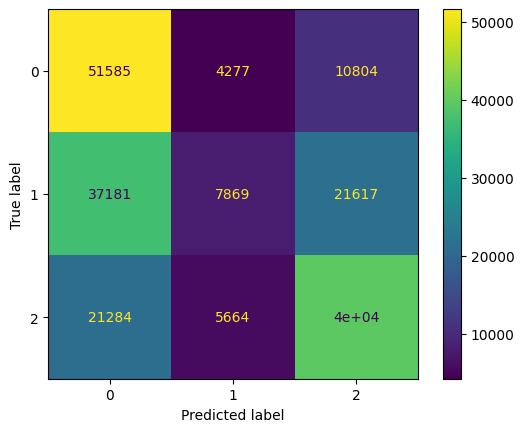

In [13]:
print("Classification Report:\n", classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)